Linear Regression:
  R²: 0.8498  MSE: 3.6842  RMSE: 1.9194

Ridge Regression:
  R²: 0.8496  MSE: 3.6903  RMSE: 1.9210

Linear Regression CV R² mean: 0.7956
Ridge Regression CV R² mean: 0.7956


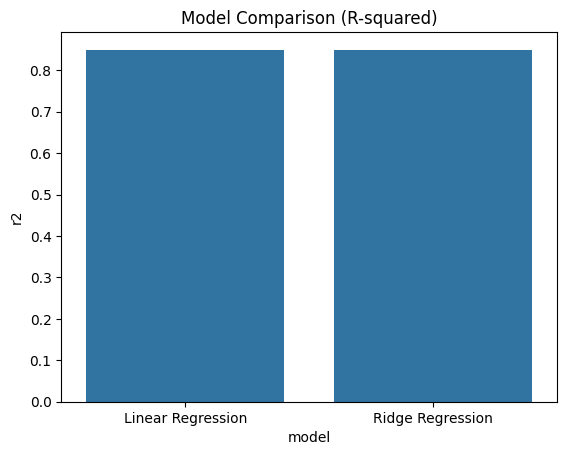

In [1]:
# index_1_regression_analysis.ipynb

#  1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#  2. Load Dataset
df = pd.read_csv("index_1.csv")
df['datetime'] = pd.to_datetime(df['datetime'])

#  3. Feature Engineering
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Drop unused columns
df_model = df[['money', 'hour', 'day_of_week', 'coffee_name']]

#  4. Prepare Features and Target
X = df_model.drop("money", axis=1)
y = df_model["money"]

#  5. Preprocessing with Pipeline
categorical_features = ['coffee_name']
numeric_features = ['hour', 'day_of_week']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  7. Linear Regression Model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

#  8. Ridge Regression Model
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge(alpha=1.0))])

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

#  9. Evaluation Function
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name}:\n  R²: {r2:.4f}  MSE: {mse:.4f}  RMSE: {rmse:.4f}\n")
    return {"model": name, "r2": r2, "mse": mse, "rmse": rmse}

#  10. Evaluate Models
results = []
results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))
results.append(evaluate_model("Ridge Regression", y_test, y_pred_ridge))

#  11. Cross-Validation
cv_lr = cross_val_score(lr_pipeline, X, y, cv=5, scoring='r2')
cv_ridge = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')

print(f"Linear Regression CV R² mean: {cv_lr.mean():.4f}")
print(f"Ridge Regression CV R² mean: {cv_ridge.mean():.4f}")

#  12. Visualize Results
result_df = pd.DataFrame(results)
sns.barplot(data=result_df, x="model", y="r2")
plt.title("Model Comparison (R-squared)")
plt.show()
